# Лабораторная работа №1 «Численное решение дифференциальных уравнений»



## Вступление

В первой лабораторной Вашей задачей будет изучить и реализовать различные методы для численного решения дифференциальных уравнений.

Наверное, из курса физики Вы успели заметить, что дифференциальные уравнения появляются при описании явлений современного мира практически повсеместно, и практически никогда эти уравнения невозможно разрешить даже в квадратурах (выразив $y(x)$ через элементарные функции и интегралы от них).

Однако, физическими задачами уже никого не удивить, а уравнение движения маятника Вам уже, наверное, набило оскомину. Да и складывающееся ощущение, что дифферецниальные уранвения возникают только лишь в задачах естествознания, ошибочно. Чтобы показать это, в качестве задачи в данной лабораторной работе рассматривается интересный пример использования дифференциальных уравнений в задачах искусственного интеллекта. *Неожиданно?!* Давайте разбираться.

## Задание 1. Численное решение дифференциального уравнения первого порядка.

Прежде чем приступить к интеллекту искусственному, применим интеллект естественный для реализации функций численного решения дифференциальных уравнений.


### Описание задачи

Так как дальше нам понадобится решать систему уравнений, то сразу будем решать задачу Коши
$$
\begin{cases} x(t)' = f(t, x(t)),\\ x(t_0) = x_0 \end{cases} \quad \text{где } x,x_0 \in \mathbb{R}^n, \ t \in [t_0,T].
$$

Рассмотрим два, наверное, самых распространенных метода:
- Метод ломаных Эйлера,
- Метод Рунге—Кутты.

Импортируем необходимые нам далее библиотеки.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Метод ломаных Эйлера

Метод Эйлера — это канонический и, честно говоря, простейший численный метод для решения дифференциальных уравнений. Мы будем искать приближение решения в виде ломаной. Для того, чтобы построить ломаную, нужно найти координаты ее вершин, этим и займемся.



##### Теоретические выкладки

Зададим на отрезке $[t_0, T]$ некоторое разбиение $\big\{t_m\big\}_{m=0}^M$.

Пусть $\varphi(t)$ — истинное решение. Разложим функцию$^*$ $\varphi(t)$ по Тейлору в точке $t_k ,\;  k \in \{0,1,\dots,M-1\}$:
$$
\varphi(t) = \varphi(t_k) + (t-t_k)\cdot \varphi'(t_k) + \mathrm{\overline o}\left(t-t_k\right).
$$
Подставим $t=t_{k+1}$:
$$
\varphi(t_{k+1}) = \varphi(t_k) + (t_{k+1}-t_k)\cdot \varphi'(t_k)  + \mathrm{\overline o}\left(t_{k+1}-t_k \right).
$$
Обозначим $h_k = t_{k+1} - t_k$ и обрубим наше разложение, отбросив о-малое. Тогда
$$
\psi(t_{k+1}) = \varphi(t_k) + h_k \cdot \varphi'(t_k)
$$
— приближенное значение $\varphi(t_{k+1})$, $\psi(t_0) = x_0$.

Так как $\varphi(t)$ — решение уравнения $x'=f(t,x)$, то $\varphi'(t) = f(t, \varphi(t))$, а значит
$$
\psi(t_{k+1}) = \varphi(t_k) + h_k \cdot f(t_k, \varphi(t_k)).
$$
Так как $\psi(t_k)$ — приближенное значение $\varphi (t_k)$, то, с некоторой потерей точности, в правой части можем заменить все $\varphi(t_k)$ на $\psi(t_k)$.

Тогда получаем множество упорядоченных вершин ломаной Эйлера:
$$\boxed{\psi(t_{k+1}) = \psi(t_k) + h_k \cdot f(t_k, \psi(t_k)), \quad \psi(t_0) = x_0}$$

Тогда для построения приближенного решения задачи Коши достаточно запустить вычисление вплоть до $\psi(t_M)$.

Более подробно, а именно: то, почему метод сходится, какая погрешность получается и т.д., обсуждалось на практических занятиях.

<sub>* В случае, когда у нас система уравнений, то есть $x$ является вектором, просто проделываем данные рассуждения  покомпонентно.</sub>

##### Реализация метода

Реализуйте метод ломаных Эйлера для задачи Коши
$$
\begin{cases}
x'(t) = f(t, x(t)),\\
x(t_0) = x_0,\\
t\in [t_0, T].
\end{cases}
$$
в функции `Euler_method`, принимающей в качестве аргументов:
- `fun` — функция, задающая правую часть уравнения,
- `t` — список с границами отрезка — список $[t_0, T]$,
- `x_0` — вектор$_{(n\times 1)}$ начального значения при $t=t_0$,
- `dt` — величина $h_k$ (для простоты примем разбиение равномерным),
- `args` — словарь с аргументами для функции `fun` (в Python можно передавать в аргументы функции словарь [с помощью оператора `**` перед словарем](https://stackoverflow.com/questions/334655/passing-a-dictionary-to-a-function-as-keyword-parameters)),

и возвращающей список с первой координатой — массивом с точками разбиения $t_k$, а второй — массивом со значениями приближенного решения в этих точках.

In [ ]:
'''
Реализация метода ломаных Эйлера в функции Euler_method
'''

def Euler_method(fun, t, x_0, dt, args={}):
    #массив, созданный для возвращения ответов, когда x0 является числом
    answer = [[] for i in range(2)]
    #создаем массив значений t_i, на основе границ и величины шага
    t_points = np.arange(t[0], t[1], dt)
    '''создаем массив под точки x, значения которых будут вычисленны
     с помощью метода Эйлера, данный вариант массива актуален,
     когда x0 является числом '''
    x_points = [0] * len(t_points)

    ''' проверка того, что x0 задано в виде вектора, актуально для решения
    задачи с цифрами (вторая часть)'''
    if type(x_0) == type(np.array([1])):
      x_points = np.array([np.zeros(len(x_0)) for i in range(len(t_points))])

    # задание начального условия для решения задачи Коши
    x_points[0] = x_0

    '''заполнение массива x_points согласно методу Эйлера, действия
     аналогичны описанным в теоретических выкладках'''
    for i in range(len(t_points) - 1):
      x_points[i + 1] = x_points[i] + dt * fun(t_points[i], x_points[i], **args)

    answer[0] = t_points
    answer[1] = x_points

    if type(x_0) == type(np.array([1])):
      #ответ в случае, когда x0 является вектором
      return {t_points[i]: x_points[i] for i in range(len(t_points) - 1)}
    else:
      #ответ в случае, когда x0 является числом
      return answer





##### Пример

Давайте проверим Вашу реализацию на примере.

Рассмотрим уравнение Бернулли
$$
x' = -\frac{2x}{t} - t^4x^3e^t
$$
с начальным условием $x(1) = \frac{1}{2e}$ на отрезке $[1,1.5]$ и сравним его численное решение с аналитическим (которое, правда, Вам придется найти самим)

---
> ✨ **Решение дифференциального уравнения**✨
>
>
>$x'=-\frac{2x}{t} - t^4x^3e^t$
>
>$x'=-\frac{2x}{t} - t^4x^3e^t\, \, \left| \, :\, x^3 \right.$
>
>$\frac{x'}{x^3}=-\frac{2}{x^2t} - t^4e^t$
>
>Замена: $p=\frac{1}{x^2}, \, x = \frac{1}{\sqrt{p}}, \, \, x' = -\frac{p'}{2p \sqrt{p}}$
>
>$-\frac{p'}{2p \sqrt{p}}p \sqrt{p}=-\frac{2p}{t} - t^4e^t$
>
>$p'=\frac{4p}{t} +2 t^4e^t$
>
>Решим полученное уравнение методом Бернулли: $p = uv\, , \, \, p' = u'v+uv'$
>
>$u'v+uv'=\frac{4uv}{t} +2 t^4e^t$
>
>$uv' + v \left( u' - \frac{4u}{t} \right)=2 t^4e^t$
>
>$\begin{cases} u' - \frac{4u}{t}= 0\\ uv'=2 t^4e^t \end{cases}$
>
>$u' = \frac{4u}{t} \, \left| \, : \, \, u \neq 0 \right.$
>
>$ \frac{du}{u} = \frac{4dt}{t}$
>
>$ \int \frac{du}{u} = \int \frac{4dt}{t}$
>
>$ \ln \left|u \right| = \ln t^4$
>
>$ u=  t^4$
>Подставим во второе уравнение системы:
>
>$t^4v'=2 t^4e^t \, \left| \, : \, \, t^4 \neq 0 \right.$
>
>$v'=2e^t$
>
>$\int dv=2 \int e^tdt$
>
>$v=2e^t + C$
>
>$p = uv=t^4 \left( 2e^t + C \right)$
>
>$x = \frac{1}{\sqrt{p}}=\frac{1}{t^2 \sqrt{2e^t + C}}$
>
>Решение задачи Коши при $x(1) = \frac{1}{2e}$
>
>$\frac{1}{2e} = \frac{1}{\sqrt{2e + C}}$
>
>$C = 4e^2-2e$
>
>*Ответ*: $x =\frac{1}{t^2 \sqrt{2e^t + 4e^2-2e}}$
---

In [ ]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''

def f(t,x):
    return (-2 * x / t - t ** 4 * x ** 3 * np.exp(t))


Запустите метод Эйлера с разными значениями шага и оцените на глаз, насколько мы близки к истинному решению.

Сделайте вывод относительно связи между размером шага, точностью и временем работы программы.

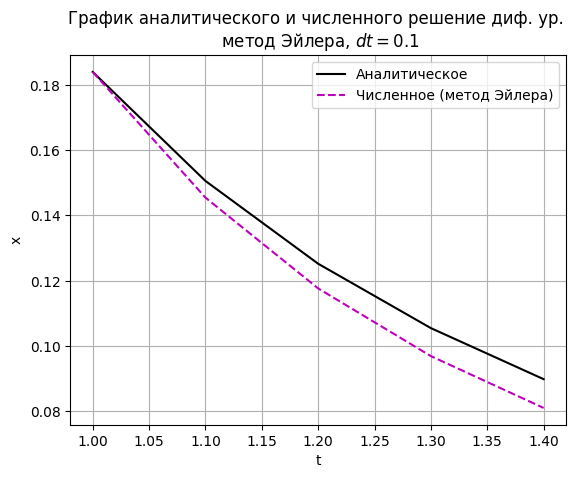

In [ ]:
'''
Запустите метод Эйлера с необходимыми начальными условиями и шагом 0.1
Постройте на одном графике точное решение и полученное методом Эйлера
'''
# шаг
dt = 0.1
# задание интервала в соответствии с указанным в тз [1, 1.5]
t_for_eu = [1, 1.5]
#для обобщения, будем передавать в функцию пустой словарь аргументов
args = {}
''' в ответ нам придет массив, в первом аргументе которого записаны точки t,
а во втором - соотвествующие точки x'''
fr_euler = Euler_method(f, t_for_eu, 1 / (2 * np.exp(1)), dt, **args)
t_n = fr_euler[0]

#построение графиков
plt.plot(t_n, 1 / (t_n ** 2 * np.sqrt(2 * np.exp(t_n) + 4 * np.exp(2) - 2 * np.exp(1))), 'k') #график точного решения
plt.plot(t_n, fr_euler[1], 'm--') #график численного решения
plt.xlabel("t")
plt.ylabel("x")
plt.legend(('Аналитическое', 'Численное (метод Эйлера)'))
plt.title(('График аналитического и численного решение диф. ур. \n метод Эйлера, $dt = 0.1$'))
plt.grid()
plt.show()





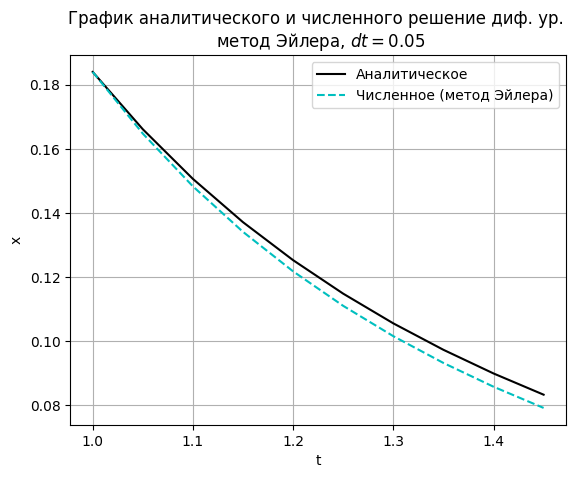

In [ ]:
'''
Запустите метод Эйлера с необходимыми начальными условиями и шагом 0.05
Постройте на одном графике точное решение и полученное методом Эйлера
'''
# шаг
dt = 0.05
# задание интервала в соответствии с указанным в тз [1, 1.5]
t_for_eu = [1, 1.5]
#для обобщения, будем передавать в функцию пустой словарь аргументов
args = {}
''' в ответ нам придет массив, в первом аргументе которого записаны точки t,
а во втором - соотвествующие точки x'''
fr_euler = Euler_method(f, t_for_eu, 1 / (2 * np.exp(1)), dt, **args)
t_n = fr_euler[0]

#построение графиков
plt.plot(t_n, 1 / (t_n ** 2 * np.sqrt(2 * np.exp(t_n) + 4 * np.exp(2) - 2 * np.exp(1))), 'k') #график точного решения
plt.plot(t_n, fr_euler[1], 'c--') #график численного решения
plt.xlabel("t")
plt.ylabel("x")
plt.legend(('Аналитическое', 'Численное (метод Эйлера)'))
plt.title(('График аналитического и численного решение диф. ур. \n метод Эйлера, $dt = 0.05$'))
plt.grid()
plt.show()


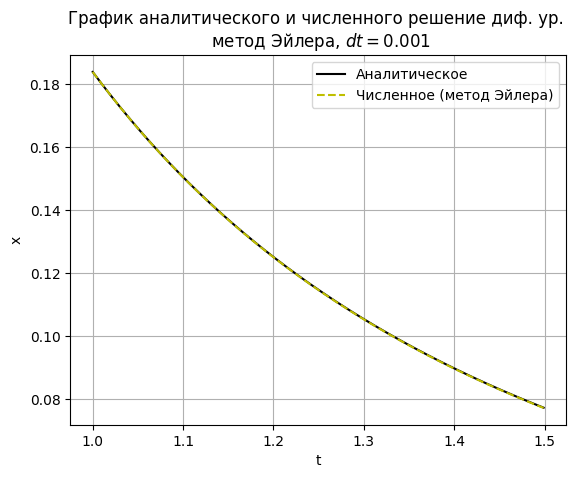

In [ ]:
'''
Запустите метод Эйлера с необходимыми начальными условиями и шагом 0.001
Постройте на одном графике точное решение и полученное методом Эйлера
'''
# шаг
dt = 0.001
# задание интервала в соответствии с указанным в тз [1, 1.5]
t_for_eu = [1, 1.5]
#для обобщения, будем передавать в функцию пустой словарь аргументов
args = {}
''' в ответ нам придет массив, в первом аргументе которого записаны точки t,
а во втором - соотвествующие точки x'''
fr_euler = Euler_method(f, t_for_eu, 1 / (2 * np.exp(1)), dt, **args)
t_n = fr_euler[0]

#построение графиков
plt.plot(t_n, 1 / (t_n ** 2 * np.sqrt(2 * np.exp(t_n) + 4 * np.exp(2) - 2 * np.exp(1))), 'k-') #график точного решения
plt.plot(t_n, fr_euler[1], 'y--') #график численного решения
plt.xlabel("t")
plt.ylabel("x")
plt.legend(('Аналитическое', 'Численное (метод Эйлера)'))
plt.title(('График аналитического и численного решение диф. ур. \n метод Эйлера, $dt = 0.001$'))
plt.grid()
plt.show()


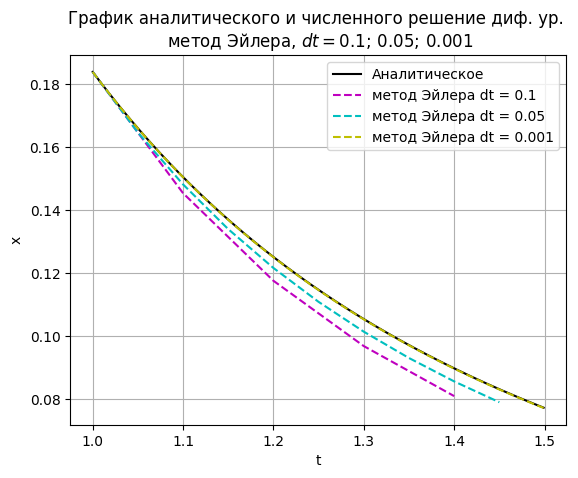

In [ ]:
'''
Постройте на одном графике точное решение
и полученные выше методом Эйлера с шагами 0.1, 0.05, 0.001 приближенные решения
'''

dt_1 = 0.1
dt_2 = 0.05
dt_3 = 0.001
t_for_eu = [1, 1.5]
args = {}
''' получение трех массивов, в первом аргументе каждого из которых записаны
 точки t, а во втором - соотвествующие точки x'''
fr_euler_1 = Euler_method(f, t_for_eu, 1 / (2 * np.exp(1)), dt_1, **args)
fr_euler_2 = Euler_method(f, t_for_eu, 1 / (2 * np.exp(1)), dt_2, **args)
fr_euler_3 = Euler_method(f, t_for_eu, 1 / (2 * np.exp(1)), dt_3, **args)
t_n_1 = fr_euler_1[0]
t_n_2 = fr_euler_2[0]
t_n_3 = fr_euler_3[0]

#построение графиков
plt.plot(t_n_3, 1 / (t_n ** 2 * np.sqrt(2 * np.exp(t_n) + 4 * np.exp(2) - 2 * np.exp(1))), 'k') #график точного решения
plt.plot(t_n_1, fr_euler_1[1], 'm--') #график численного решения d = 0.1
plt.plot(t_n_2, fr_euler_2[1], 'c--') #график численного решения d = 0.05
plt.plot(t_n_3, fr_euler_3[1], 'y--') #график численного решения d = 0.001

plt.xlabel("t")
plt.ylabel("x")
plt.legend(('Аналитическое', 'метод Эйлера dt = 0.1', 'метод Эйлера dt = 0.05', 'метод Эйлера dt = 0.001'))
plt.title(('График аналитического и численного решение диф. ур. \n метод Эйлера, $dt = 0.1; \, 0.05; \, 0.001$'))
plt.grid()
plt.show()


---
> ✨ **Вывод** ✨
>
> *На мой взгляд, метод Эйлера является довольно простым и относительно точным инструментом для нахождения численного решения дифференциального уравнения. На основе построенных выше графиков мы убедились в том, что с увеличением мелкости разбиения, повышается точность полученного численного результата, так, например, при $dt = 0.1$, разница между кривыми составляла около 12% в точке $t = 1.4$, при $dt = 0.05$, можно оценить разницу примерно в 5% в той же точке, при $dt = 0.001$ график точного решения уже визуально не отличим от полученного с помощью метода Эйлера.*
---

#### Метод Рунге-Кутты

Теперь рассмотрим не столько геометрически понятный, но достаточно часто применяемый на практике метод Рунге—Кутты, ограничившись лишь вторым порядком последнего.

##### Теоретические выкладки

Так как $\varphi$ — решение исходной задачи Коши, то $\varphi'(t) = f(t, \varphi(t))$, а также
$$
\varphi''(t) = \frac{d}{d t} f(t, \varphi(t)) = \frac{\partial f(t, \varphi)}{\partial t} + \frac{\partial f(t, \varphi)}{\partial \varphi} \frac{d\varphi(t)}{dt}= \frac{\partial f(t, \varphi)}{\partial t} + \frac{\partial f(t, \varphi)}{\partial \varphi} f(t,\varphi(t)).
$$

Аналогично тому, что делали ранее, воспользуемся разложением Тейлора на отрезке в точке $t_k$ и подставим точку $t_{k+1}$:
$$
\varphi(t_{k+1}) = \varphi(t_k) + (t_{k+1}-t_k)\cdot \varphi'(t_k) + \frac{1}{2}(t_{k+1}-t_k)^2\cdot \varphi''(t_k) + \mathrm{\overline o}\left((t_{k+1}-t_k)^2\right).
$$
Отбросим слагаемое с о-малым, подставим выражения для $\varphi'$, $\varphi''$ и обозначим правую часть за $\psi(t_{k+1})$, получив
$$
\psi(t_{k+1}) = \varphi(t_k) + (t_{k+1}-t_k)\cdot f(t_k, \varphi(t_k)) + \frac{1}{2}(t_{k+1}-t_k)^2\cdot \left.\left(f'_t(t, \varphi) + f'_\varphi(t, \varphi) f(t,\varphi(t))\right)\right|_{(t_k, \varphi(t_k))}. \tag{o}
$$

Запишем теперь разложение Тейлора функции двух переменных $f(t,\varphi)$ в точке $(t_k, \varphi(t_k))$ и подставим точку $\big(t_{k+1}, \varphi(t_{k})+ (t_{k+1}-t_k)f(t_k, \varphi(t_k))\big)$
$$
f\big(t_{k+1},\varphi(t_{k})+ (t_{k+1}-t_k)f(t_k, \varphi(t_k))\big) \approx f(t_k, \varphi(t_k)) + (t_{k+1}-t_k)f'_t(t_k, \varphi(t_k)) + (t_{k+1} - t_k)  f(t_k, \varphi(t_k)f'_\varphi.
$$

Заметим, что это очень похоже на правую часть в выражении (o). Тогда, домножив на $\frac12 (t_{k+1}-t_k)$, получим
$$
\psi(t_{k+1}) = \varphi(t_k) + \frac12 (t_{k+1}-t_k)\cdot f(t_k, \varphi(t_k)) + \frac12(t_{k+1} - t_k) f\big(t_{k+1}, \varphi(t_{k})+(t_{k+1} - t_k)f(t_k, \varphi(t_k))\big).
$$

Или, вводя обозначение длины шага $h_k = t_{k+1} - t_k$ и подменяя в правой части истинное решение на приближенное, получаем итерационную схему для метода Рунге—Кутты 2-ого порядка
$$
\boxed{
\psi(t_{k+1}) = \psi(t_k) + \frac12 \underbrace{h_k \cdot f(t_k, \psi(t_k))}_{k_1} + \frac12 \underbrace{h_k f\big(t_{k+1}, \psi(t_{k})+h_k f(t_k, \psi(t_k))\big)}_{k_2}.
}
$$


##### Реализация метода

Реализуйте метод Рунге-Кутты для задачи Коши
$$
\begin{cases}
x'(t) = f(t, x(t)),\\
x(t_0) = x_0,\\
t\in [t_0, T].
\end{cases}
$$
в функции `Runge_Kutta_method`, принимающей в качестве аргументов:
- `fun` — функция, задающая правую часть уравнения,
- `t` — список с границами отрезка — список $[t_0, T]$,
- `x_0` — вектор$_{(n\times 1)}$ начального значения при $t=t_0$,
- `dt` — величина $h_k$ (для простоты примем разбиение равномерным),
- `args` — словарь с аргументами для функции `fun` (в Python можно передавать в аргументы функции словарь [с помощью оператора `**` перед словарем](https://stackoverflow.com/questions/334655/passing-a-dictionary-to-a-function-as-keyword-parameters)),

и возвращающей список с первой координатой — массивом с точками разбиения $t_k$, а второй — массивом со значениями приближенного решения в этих точках.

In [ ]:
'''
Реализация метода Рунге—Кутты в функции Runge_Kutta_method
'''

def Runge_Kutta_method(fun, t, x_0, dt, args={}):
    #массив, созданный для возвращения ответов, когда x0 является числом
    answer = [[] for i in range(2)]
    #создаем массив значений t_i, на основе границ и величины шага
    t_points = np.arange(t[0], t[1], dt)
    '''создаем массив под точки x, значения которых будут вычисленны
     с помощью метода Рунге-Кутта, данный вариант массива актуален,
     когда x0 является числом '''
    x_points = [0] * len(t_points)

    ''' проверка того, что x0 задано в виде вектора, актуально для решения
    задачи с покемоном (вторая часть)'''
    if type(x_0) == type(np.array([1])):
      x_points = np.array([np.zeros(len(x_0)) for i in range(len(t_points))])

    # задание начального условия для решения задачи Коши
    x_points[0] = x_0
    '''заполнение массива x_points согласно методу Рунге-Кутты, действия
     и формулы аналогичны описанным в теоретических выкладках'''
    for i in range(len(t_points) - 1):
      k_1 = fun(t_points[i], x_points[i], **args) * dt
      k_2 = fun(t_points[i + 1], k_1 + x_points[i], **args) * dt
      x_points[i + 1] = x_points[i] + 0.5 * k_1 + 0.5 * k_2

    answer[0] = t_points
    answer[1] = x_points

    if type(x_0) == type(np.array([1])):
      #ответ в случае, когда x0 является вектором
      return {t_points[i]: x_points[i] for i in range(len(t_points) - 1)}
    else:
      #ответ в случае, когда x0 является числом
      return answer


##### Пример

Давайте проверим Вашу реализацию на примере.

Рассмотрим уравнение Бернулли
$$
x' = tx^2-x
$$
с начальным условием $x(0) = \frac{1}{2}$ на отрезке $[0, 2]$ и сравним его численное решение с аналитическим (которое, правда, Вам придется найти самим)

---
> ✨**Решение дифференциального уравнения**✨
>
>
>$x'= tx^2-x$
>
>$x'= tx^2-x \,\,\, \left| : x^2 \neq 0 \right. $
>
>$\frac{x'}{x^2}= t- \frac{1}{x}$
>
>Замена переменной: $\frac{1}{x} = p(t)$.
>
>$\frac{1}{x} = p \, \, \to \frac{1}{p} = x\, , \, \,  x' = -\frac{p'}{p^2}$
>
>$-p'= t - p$
>
>Замена: $u(t) = t - p\, , \, \, p = t-u$.
>
>$u'=1 -p' \, \, \to -p'=u'-1$
>
>$u'= u + 1$
>
>$\frac{du}{dt} = u+1\,\,\, \left| : (u+1) \neq 0 \right.$
>
>$\int \frac{du}{u+1} = \int dt$
>
>$\ln \left| u+1 \right|= t + C$
>
>$u+1= e^{t + C}$
>
>$u= e^{t + C} - 1$
>
>$p= t - e^{t + C} + 1$
>
>$x = \frac{1}{t - С_1e^{t} + 1}$
>
>Решение задачи Коши: $x = \frac{1}{t - С_1e^{t} + 1}$,  $x(0) = \frac{1}{2}$
>
>$ \frac{1}{2} = \frac{1}{-С_1 + 1}\, \, \to C = -1$
>
>*Ответ*: $x = \frac{1}{t + e^{t} + 1}$
---

In [ ]:
'''
Задайте функцию f(t,x) — правую часть предложенного уравнения
'''

def f(t,x):
    return (t * x ** 2 - x)


Запустите метод Рунге—Кутты с разными значениями шага и оцените на глаз, насколько мы близки к истинному решению.

Сделайте вывод относительно связи между размером шага, точностью и временем работы программы.

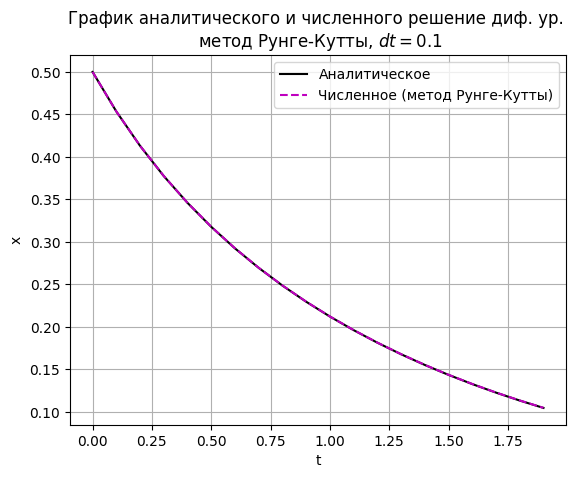

In [ ]:
'''
Запустите метод Рунге—Кутты с необходимымы начальными условиями и шагом 0.1
Постройте на одном графике точное решение и полученное методом Рунге-Кутты
'''
# шаг
dt = 0.1
# задание интервала в соответствии с указанным в тз [0, 2]
t_for_rk = [0, 2]
#для обобщения, будем передавать в функцию пустой словарь аргументов
args = {}
''' в ответ нам придет массив, в первом аргументе которого записаны точки t,
а во втором - соотвествующие точки x'''
fr_rk = Runge_Kutta_method(f, t_for_rk, 1 / 2, dt, **args)
# точки t переданные из функции Runge_Kutta_method
t_n = fr_rk[0]

#построение графиков
plt.plot(t_n, 1 / (t_n + np.exp(t_n) + 1), 'k') #график точного решения
plt.plot(t_n, fr_rk[1], 'm--') #график численного решения
plt.xlabel("t")
plt.ylabel("x")
plt.legend(('Аналитическое', 'Численное (метод Рунге-Кутты)'))
plt.title(('График аналитического и численного решение диф. ур. \n метод Рунге-Кутты, $dt = 0.1$'))
plt.grid()
plt.show()


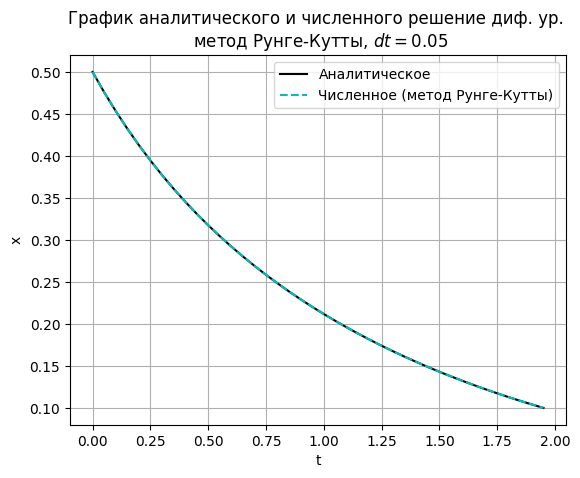

In [ ]:
'''
Запустите метод Рунге-Кутты с необходимымы начальными условиями и шагом 0.05
Постройте на одном графике точное решение и полученное методом Рунге-Кутты
'''
# шаг
dt = 0.05
# задание интервала в соответствии с указанным в тз [0, 2]
t_for_rk = [0, 2]
#для обобщения, будем передавать в функцию пустой словарь аргументов
args = {}

''' в ответ нам придет массив, в первом аргументе которого записаны точки t,
а во втором - соотвествующие точки x'''
fr_rk = Runge_Kutta_method(f, t_for_rk, 1 / 2, dt, **args)
# точки t переданные из функции Runge_Kutta_method
t_n = fr_rk[0]

#построение графиков
plt.plot(t_n, 1 / (t_n + np.exp(t_n) + 1), 'k') #график точного решения
plt.plot(t_n, fr_rk[1], 'c--') #график численного решения
plt.xlabel("t")
plt.ylabel("x")
plt.legend(('Аналитическое', 'Численное (метод Рунге-Кутты)'))
plt.title(('График аналитического и численного решение диф. ур. \n метод Рунге-Кутты, $dt = 0.05$'))
plt.grid()
plt.show()


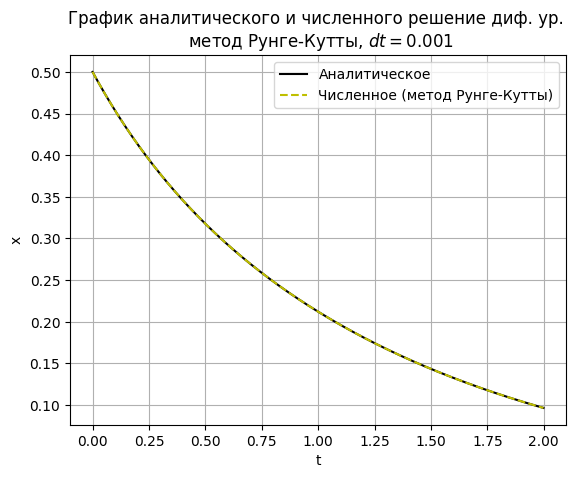

In [ ]:
'''
Запустите метод Рунге-Кутты с необходимымы начальными условиями и шагом 0.001
Постройте на одном графике точное решение и полученное методом Рунге-Кутты
'''
# шаг
dt = 0.001
# задание интервала в соответствии с указанным в тз [0, 2]
t_for_rk = [0, 2]
#для обобщения, будем передавать в функцию пустой словарь аргументов
args = {}
''' в ответ нам придет массив, в первом аргументе которого записаны точки t,
а во втором - соотвествующие точки x'''
fr_rk = Runge_Kutta_method(f, t_for_rk, 1 / 2, dt, **args)
# точки t переданные из функции Runge_Kutta_method
t_n = fr_rk[0]

#построение графиков
plt.plot(t_n, 1 / (t_n + np.exp(t_n) + 1), 'k') #график точного решения
plt.plot(t_n, fr_rk[1], 'y--') #график численного решения
plt.xlabel("t")
plt.ylabel("x")
plt.legend(('Аналитическое', 'Численное (метод Рунге-Кутты)'))
plt.title(('График аналитического и численного решение диф. ур. \n метод Рунге-Кутты, $dt = 0.001$'))
plt.grid()
plt.show()


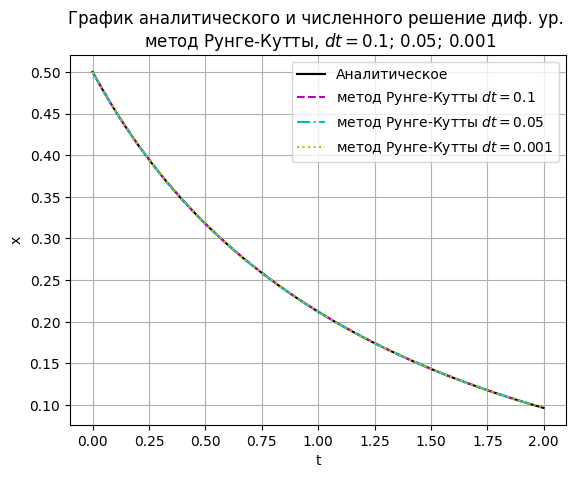

In [ ]:
'''
Постройте на одном графике точное решение
и полученные выше методом Эйлера с шагами 0.1, 0.05, 0.001 приближенные решения
'''

dt_1 = 0.1
dt_2 = 0.05
dt_3 = 0.001
t_for_rk = [0, 2]
args = {}
''' получение трех массивов, в первом аргументе каждого из которых записаны
 точки t, а во втором - соотвествующие точки x'''
fr_rk_1 = Runge_Kutta_method(f, t_for_rk, 1 / 2, dt_1, **args)
fr_rk_2 = Runge_Kutta_method(f, t_for_rk, 1 / 2, dt_2, **args)
fr_rk_3 = Runge_Kutta_method(f, t_for_rk, 1 / 2, dt_3, **args)
t_n_1 = fr_rk_1[0]
t_n_2 = fr_rk_2[0]
t_n_3 = fr_rk_3[0]

# построение графиков
plt.plot(t_n_3, 1 / (t_n + np.exp(t_n) + 1), 'k') #график точного решения
plt.plot(t_n_1, fr_rk_1[1], 'm--') #график численного решения d = 0.1
plt.plot(t_n_2, fr_rk_2[1], 'c-.') #график численного решения d = 0.05
plt.plot(t_n_3, fr_rk_3[1], 'y:') #график численного решения d = 0.001
plt.xlabel("t")
plt.ylabel("x")
plt.legend(('Аналитическое', 'метод Рунге-Кутты $dt = 0.1$', 'метод Рунге-Кутты $dt = 0.05$', 'метод Рунге-Кутты $dt = 0.001$'))
plt.title(('График аналитического и численного решение диф. ур. \n метод Рунге-Кутты, $dt = 0.1;\, 0.05; \, 0.001$'))
plt.grid()
plt.show()


---
> ✨ **Вывод** ✨
>
> *Мне кажется, что метод Рунге-Кутты является более точным, чем метод Эйлера, ведь при том же выбранном шаге, например, $dt = 0.1$, результат Рунге-Кутты будет неотличим на глаз от точного решения, в то время, как метод Эйлера даст только приближенный график решения, визуально отделимый от аналитического результата.*
---

## Задание 2. Восстановление цифр по бракованным картинкам.

### Описание задачи

Вам предоставлен кусок тренировочной выборки из базы данных [MNIST](https://www.kaggle.com/datasets/hojjatk/mnist-dataset). А также бракованные изображения из этого же датасета.

<p>    
    <center>
    <img src="https://drive.google.com/uc?export=view&id=1jgWvIHwXkhQ1iE6ER0Wy_SLxBvCWW1Dd" alt="Проблемы с отображением изображения. Обратитесь к автору" width=500>
    <img src="https://drive.google.com/uc?export=view&id=1AET7slaGnEePLx3qjrxycJSXfHJg55bz" alt="Проблемы с отображением изображения. Обратитесь к автору" width=500>
    <em><br>Пример данных из датасета MNIST<br>Сначала: тренировочные изображения,<br>Потом: бракованные изображения</em>
    </center>
</p>

Необходимо, используя простейшую версию [нейронной сети Хопфилда](https://arxiv.org/abs/2008.02217), восстановить цифры на бракованных изображениях.

<p>    
    <center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/b/b4/Hopfield%27s_net.png" alt>
    <em><br>Пример: схема нейронной сети Хопфилда с тремя нейронами</em>
    </center>
</p>

Переписывая заданную в нейронной сети Хопфилда структуру с $m$ нейронами в виде уравнения в матричном виде, можно получить
$$\boxed{x' = A^T \mathrm{softmax}(\beta Ax) - x}, \tag{1}$$
где $A$ — $\text{матрица}_{(m \times n)}$ весов, $\beta \in \mathbb{R}$, $x$ — $\text{вектор}_{(n, 1)}$ входных нейронов, $\mathrm{softmax}(z)_i = \frac{e^{z_i}}{\sum_{k} e^{z_k}}$ — функция активации.

А значит, задача применения нейронной сети с известной$^*$ матрицей весов сводится к решению дифференциального уравнения (1).

<sub>$^*$ Матрица с весами нетрудно получается на
основе тренировочных данных, о чем мы поговорим чуть дальше.</sub>

Нам дальше понадобится функция $\mathrm{softmax}(x)$. Реализуйте более удобную далее в применении $\mathrm{softmax}(\beta \cdot x)$ в функции `softmax(x, beta)`, рассматривая $x$ как массив `numpy.array`, а $\beta$ — как число.

In [ ]:
'''
Функция softmax(beta*x)
x — numpy.array
beta — число
'''
#функция активации, формула совпадает с приведенной в теоретических выкладках
def softmax(x, beta=1):
    return (np.exp(beta * x) / sum(np.exp(beta * x)))


Запишите правую часть уравнения (1), с которым мы дальше будем активно работать, в функцию `dynamics(x, A, beta)`. Используйте в качестве $x$ и $A$ массивы `numpy.array`, а в качестве $\beta$ — число.

In [ ]:
'''
Правая часть уравнения (1)
x — numpy.array
A — numpy.array
beta — число
'''
#основана на формуле из теоретических выкладок
def dynamics(t, x, A, beta):
    a_t = np.transpose(A)
    s_m = softmax(beta, np.matmul(A, x))
    return (np.matmul(a_t, s_m) - x)



### Интуитивное понимание принципа работы нейронной сети Хопфилда


#### Простой случай на плоскости

Для того, чтобы понять, почему предложенный выше метод работает, необходимо углубиться в дифференциальное уравнение (1).

Постройте с помощью [`plt.quiver`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html) векторное поле для уравнения $x' = A^T \mathrm{softmax} (\beta A x)-x$, положив $A = \begin{bmatrix}1&0\\0&1\\-1&-1\end{bmatrix}$, $\beta=5$.

Добавьте на этот же график точки $(1,0), (0,1), (-1,-1)$. _* Заметьте, что это просто точки из матрицы $A$, координаты которых находятся в строках этой матрицы_.

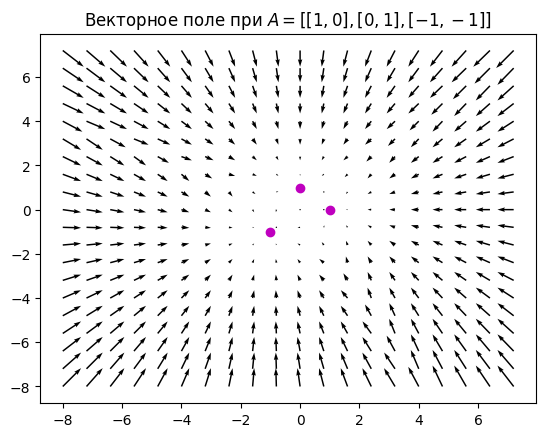

In [ ]:
'''
Векторное поле уравнения x' = A^T softmax(beta * A * x) - x
'''
# матрица А
a = np.array([[1, 0], [0, 1], [-1, -1]])
# заданная бета
b = 5

# создание и отрисовка векторного поля
x, y = np.meshgrid(np.arange(-8, 8, .8), np.arange(-8, 8, .8))
size_x = x.shape
u = np.zeros(size_x)
v = np.zeros(size_x)

for i in range(0, size_x[0]):
  for j in range(0, size_x[0]):
    key_points = dynamics(0, [[x[i, j]], [y[i, j]]], a, b)
    u[i, j] = key_points[0, 0]
    v[i, j] = key_points[1, 0]

plt.quiver(x, y, u, v)


# отрисовка точек
plt.scatter(a[0][0], a[0][1], color ='m')
plt.scatter(a[1][0], a[1][1], color = 'm')
plt.scatter(a[2][0], a[2][1], color = 'm')

plt.title(('Векторное поле при $A = [[1, 0], [0, 1], [-1, -1]]$'))
plt.show()


Замечаете странное поведение стрелочек? Они как будто смотрят на одну из наших выбранных точек.

Давайте проверим, сохранится ли такое поведение при другой матрице $A$.

Рассмотрите матрицу $A=\begin{bmatrix}2&2\\2&-1\\-3&4\\-4&-3\end{bmatrix}$.

Постройте векторное поле и найдите, какие точки обладают таким же поведением (к ним тянутся стрелочки).


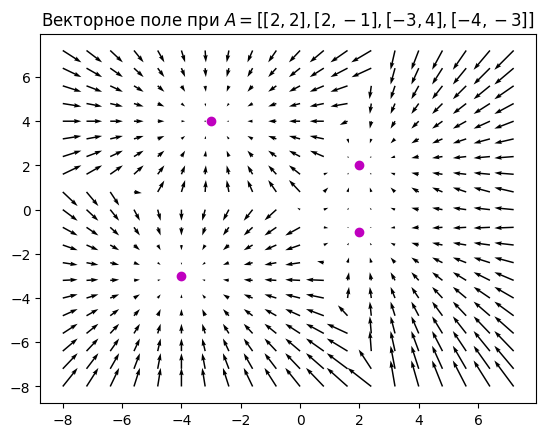

In [ ]:
'''
Векторное поле уравнения x' = A^T softmax(beta * A * x) - x
A = [[2,2],[2,-1],[-3,4],[-4,-3]]
beta = 5
'''
# матрица А
a = np.array([[2, 2], [2, -1], [-3, 4], [-4, -3]])
# заданная бета
b = 5

# создание и отрисовка векторного поля
x, y = np.meshgrid(np.arange(-8, 8, .8), np.arange(-8, 8, .8))
size_x = x.shape
u = np.zeros(size_x)
v = np.zeros(size_x)

for i in range(0, size_x[0]):
  for j in range(0, size_x[0]):
    key_points = dynamics(0, [[x[i, j]], [y[i, j]]], a, b)
    u[i, j] = key_points[0, 0]
    v[i, j] = key_points[1, 0]

plt.quiver(x, y, u, v)


# отрисовка точек
plt.scatter(a[0][0], a[0][1], color ='m')
plt.scatter(a[1][0], a[1][1], color = 'm')
plt.scatter(a[2][0], a[2][1], color = 'm')
plt.scatter(a[3][0], a[3][1], color = 'm')

plt.title(('Векторное поле при $A = [[2, 2], [2, -1],[-3,4],[-4,-3]]$'))
plt.show()


Не кажется ли это очень неплохим свойством? Вспомним, что векторное поле показывает как будто бы «направление скорости» нашей системы. А значит, начиная из какой-нибудь точки на плоскости, мы «скатимся» по стрелочкам в одну из заданных нами в матрице $A$ точек.

Подробнее о таком поведении мы поговорим ближе к концу семестра в курсе, а пока стоит понимать это именно на таком интуитивном уровне.


На самом деле, наша система (1) дает даже больше.

Давайте рассмотрим матрицу $A=\begin{bmatrix}2&3\\-3&2\\2&5\\-2&-3\\3&5\end{bmatrix}$. Видно, что несколько предполагаемых "точек притяжения" сгруппированы в первой четверти плоскости.

Постройте векторное поле для уравнения (1), используя данную матрицу, и посмотрите, как наше уравнение справляется с такими сгруппированными точками.

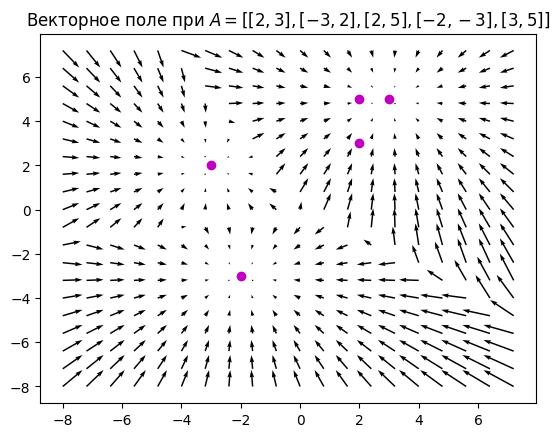

In [ ]:
'''
Векторное поле уравнения x' = A^T softmax(beta * A * x) - x
A = [[2,3],[-3,2],[2,5], [-2,-3],[3,5]]
beta = 5
'''
# матрица А
a = np.array([[2,3],[-3,2],[2,5], [-2,-3],[3,5]])
# заданная бета
b = 5

# создание и отрисовка векторного поля
x, y = np.meshgrid(np.arange(-8, 8, .8), np.arange(-8, 8, .8))
size_x = x.shape
u = np.zeros(size_x)
v = np.zeros(size_x)

for i in range(0, size_x[0]):
  for j in range(0, size_x[0]):
    key_points = dynamics(0, [[x[i, j]], [y[i, j]]], a, b)
    u[i, j] = key_points[0, 0]
    v[i, j] = key_points[1, 0]

plt.quiver(x, y, u, v)


# отрисовка точек
plt.scatter(a[0][0], a[0][1], color ='m')
plt.scatter(a[1][0], a[1][1], color = 'm')
plt.scatter(a[2][0], a[2][1], color = 'm')
plt.scatter(a[3][0], a[3][1], color = 'm')
plt.scatter(a[4][0], a[4][1], color = 'm')

plt.title(('Векторное поле при $A = [[2,3],[-3,2],[2,5], [-2,-3],[3,5]]$'))
plt.show()


Замечательно! Оказывается, что среди этих сгруппированных точек выделяется одна, которая «притягивает сильнее».



Возможно, Вам до сих пор не очень понятно, к чему все эти рассуждения и как они помогут нам с обработкой изображения. Давайте переложим рассмотренные выше идеи на датасет `MNIST`.

#### Отношение к изображениям и цифрам

Вспомним, что картинка в компьютере представляется массивом размера `(height, width)`.

Теперь представьте, что мы рассматриваем распрямленную$^*$ картинку, то есть каждый пиксель записан на новой строчке. Получившийся вектор имеет размер `(width*height,1)`.

И этот вектор мы можем подставлять в наше уравнение (1). Решая это уравнение, получим какой-то вектор новой распрямленной картинки, который мы можем обратно привести к исходному размеру `(height, width)`.

<sub>* Заметьте, что мы не теряем информацию о картинке, если помним изначальные размеры, так как в любой момент можем обратно собрать изображение по распрямленному.</sub>

Остается лишь вопрос в матрице $A$. Какую ее брать?

И оказывается, что тут нам помогут наши «точки притяжения». Ведь если мы знаем на каком-то тренировочном наборе, как примерно выглядят цифры, то можем их положить в матрицу $A$. Таким образом, мы получим, что наши тренировочные картинки являются «точками притяжения» для бракованных. А значит любая бракованная, следуя по стрелочкам векторного поля$^*$, придет к одной из тренировочных картинок, тем самым восстановив цифру на изображении.

То есть матрица $A$ будет выглядеть примерно
$$
A =
\begin{bmatrix}
    \text{тренировочная распрямленная картинка 1}\\
    \text{тренировочная распрямленная картинка 2}\\
    \vdots\\
    \text{тренировочная распрямленная картинка k}\\
\end{bmatrix}.
$$

<sub>* Стоит помнить, что теперь мы все манипуляции проворачиваем в пространстве размерности `width*height`. И там уже, конечно, под векторным полем понимается немного другое и изобразить это практически невозможно.</sub>

### Основная часть

#### Загрузка данных

<table>
  <tr>
    <td style="width:40%"><img src=https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.HVapjsP3IhY1D-JsrfGN9gHaEo%26pid%3DApi&f=1&ipt=98ac0d905405b055fade0f342067785a1f2a3e3c9dab7a80c787fcb5627cd771&ipo=images width=200></td>
    <td style="width:50%"><center><p>Выборка из датасета производится случайным образом!<br>
    Если Вы хотите работать с одними и теми же данными,<br>то сохраните файл <code>mnist.npz</code> к себе на компьютер <br>и каждый раз добавляйте его в Colab,<br>пользуясь кодом ниже.<br> Тогда данные будут читаться из него.</center></p></td>
  </tr>
</table>

In [ ]:
# @title Загрузка файла в Colab (Запускайте только если хотите добавить файл)

from google.colab import files
file =files.upload()

Training Images


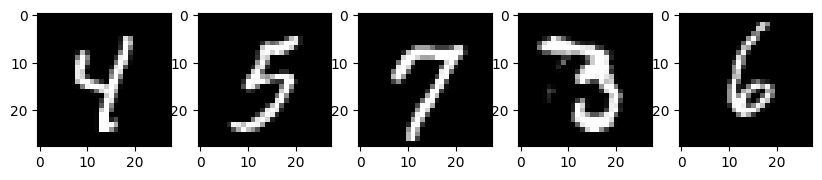

Corrupted Images


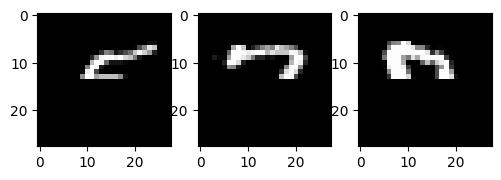

In [ ]:
# @title Загрузка выборки из датасета (запустите ячейку, исходный код скрыт) { vertical-output: true, form-width: "100%", display-mode: "form" }

import os
import torchvision.datasets as datasets
from random import sample

def show_images(images):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(10,10))
    plt.tight_layout()
    index = 1
    for x in images:
        image = x
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        index += 1

if not os.path.exists('/content/mnist.npz'):
    mnist_trainset = datasets.MNIST(root='/content/MNIST', train=True, download=True)
    train = [np.array(mnist_trainset[k][0]) for k in sample(range(len(mnist_trainset)), 5)]
    test = [np.array(mnist_trainset[k][0]) for k in sample(range(len(mnist_trainset)), 3)]
    np.savez('/content/mnist.npz', train=train, test=test)

data = np.load("/content/mnist.npz")
training_img = data["train"]
training_img = np.asarray(training_img)
corrupted_img = data["test"]
corrupted_img_true = data['test']
for i, item in enumerate(corrupted_img):
    corrupted_img[i][14:, :] = 0

print("Training Images")
show_images(training_img)
plt.show()

print("Corrupted Images")
show_images(corrupted_img)
plt.show()

Теперь у нас есть два набора:
- `training_img` — массив с изображениями, представленными в виде массивов $(28\times 28)$,
- `corrupted_img` — массив с бракованными изображениями, представленными в виде массивов $(28\times 28)$.

#### Обработка данных

Как мы выяснили ранее, для работы с изображениями нам необходимо их распрямить, то есть привести к вектору размера $(784 \times 1)$.

Запишите в переменные `training_img_flatten` и `corrupted_img_flatten` массивы распрямленных изображений соответствующих наборов `training_img` и  `corrupted_img`. Выведите получившиеся размеры массивов, используя [`numpy.shape`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html).

<sub>_Указание:_ воспользуйтесь функцией [`numpy.reshape`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)</sub>

In [ ]:
'''
Распрямите изображения и запишите итоговые массивы в переменные training_img_flatten, corrupted_img_flatten.
'''
# распремленные массивы изображений для обучения нейронной сети
training_img_flatten = [np.reshape(i, (784, 1)) for i in training_img]
# распремленные массивы поврежденных изображений
corrupted_img_flatten = [np.reshape(i, (784, 1)) for i in corrupted_img]


#### Обучение сети

Основываясь на наших предположениях из интуитивного понимания принципа работы, заполните матрицу $A$. В этом и заключается обучение нашей сети.

In [ ]:
'''
Задайте матрицу весов A
'''

A = np.array(training_img_flatten)[:, :, 0]


$\beta$ зададим равной $10^{-5}$. Вы можете поизменять этот гиперпараметр и написать в выводе, что меняется, или почитать в открытых источниках.

In [ ]:
beta = 1e-5

#### Применение обученной сети = решение дифференциального уравнения

Получается, что применение нашей сети сводится к решению задачи Коши с уравнением (1) и начальным условием, равным бракованной картинке, которую мы хотим восстановить. Понятно, что решать ее в явном виде не имеет смысла (по-крайней мере, потому что это система из 784 уравнений с функцией $\mathrm{softmax}$ внутри). Поэтому будем решать численно.

Воспользуйтесь функцией `Euler_method` из первого задания для решения заданной задачи Коши для каждой бракованной картинки с подставленными матрицей $A$ и скаляром $\beta$.

Получившиеся решения запишите в переменные `solution_i`, где $i$ — порядковый номер бракованной картинки (начинается с нуля).

In [ ]:
'''
Запишите решения задач Коши в переменные solution_i
'''
# такой шаг выбран как наиболее оптимальный, основываясь на результатах полученных в первой части работы о методе Эйлера
dt = 0.001
t_for_eu = [0, 5]
x_0 = np.array(corrupted_img_flatten)[:, :, 0]
solution_i = []

# получение решений для каждого из трех поврежденных изображений, основываясь на методе Эйлера
for i in range(3):
  eu = Euler_method(dynamics, t_for_eu, np.transpose(x_0[i]), dt, {'A': A, 'beta': beta})
  v = [*eu.values()]
  solution_i.append(v[-1])



Выведите получившиеся восстановленные изображения бок о бок с исходными бракованными. Как Вы думаете, угадал ли компьютер с цифрой? Сделайте вывод почему.

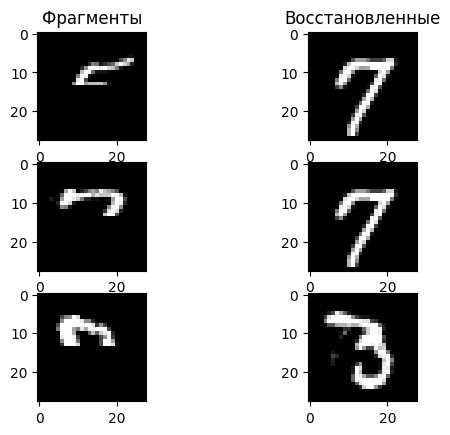

In [ ]:
'''
Вывод изображений: бракованное | восстановленное
'''
fig, ax = plt.subplots(3, 2)

ax[0, 0].set_title("Фрагменты")
ax[0, 1].set_title("Восстановленные")

for i in range(3):
  ax[i, 0].imshow(np.reshape(x_0[i], (28, 28)), cmap = 'gray')
  ax[i, 1].imshow(np.reshape(solution_i[i], (28, 28)), cmap = 'gray')



#### Вывод

Сделайте выводы относительно того, насколько удачно сработала нейронная сеть. Порассуждайте, почему так произошло.

---
> ✨ **Вывод** ✨
>
> *Мне кажется, что нейронная сеть сработала со средней степенью успеха. С одной стороны, сложно предположить, какие цифры были изначально, с другой, - нельзя сказать, что восстановленные цифры абсолютно противоположны фрагментам. На мой взгляд, первый фрагмент принадлежал цифре 5, второй цифрам 3 или 7 с равной вероятностью, третий - 3. Был выбран довольно маленьший шаг $dt = 0.001$, так как при выполнении первого задания именно при этом значении численное решение максимально приближалось к аналитическому. Но все-таки метод Эйлера не дает настолько точного результата, как, например, метод Рунге-Кутты.*
---

## Бонус! <sub>но все еще обязательный</sub>

> Я прекрасно знаю, как Вы все любите лабораторные работы с покемонами еще с первого курса.
>
> Поэтому предлагаю свою версию работы про покемонов.

### Описание задачи

Мне кажется, во всем, что связано с покемонами, есть эпизоды, когда по тени необходимо угадать имена покемонов. Именно это и предлагается сделать Вам в бонусном задании.

И, конечно, было бы интересно заставить это делать Вас самих, но лучше попросим об этом волшебную машину с нейронной сетью Хопфилда.

### Основная часть

#### Загрузка данных

<table>
  <tr>
    <td style="width:40%"><img src=https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.HVapjsP3IhY1D-JsrfGN9gHaEo%26pid%3DApi&f=1&ipt=98ac0d905405b055fade0f342067785a1f2a3e3c9dab7a80c787fcb5627cd771&ipo=images width=200></td>
    <td style="width:50%"><center><p>Картинка тени покемона каждый раз выбирается случайным образом!<br>
    Если Вы хотите написать вывод по конкретному покемону,<br>то сохраните картинки тени и результата к себе на компьютер <br>и вставьте картинки в вывод.</center></p></td>
  </tr>
</table>

Это что за покемон?


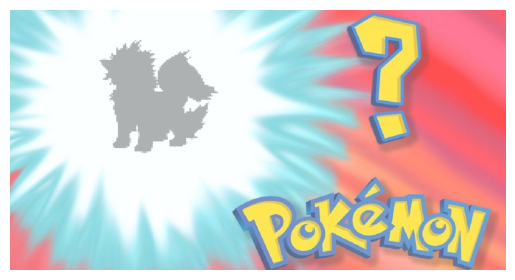

In [ ]:
# @title Загрузка покемонов (запустите ячейку, исходный код скрыт) { vertical-output: true, form-width: "100%", display-mode: "form" }
import matplotlib.image as mpimg
from urllib.request import urlretrieve
from random import choice, sample

background = mpimg.imread(urlretrieve("https://d31xsmoz1lk3y3.cloudfront.net/big/1582671.jpg?v=1558141242", "bg.jpg")[0])

urls = [
    f'https://assets.pokemon.com/assets/cms2/img/pokedex/full/0{i}.png' for i in sample(range(10, 100), 5)
]

training_img = []
shadow_img = []
for url in urls:
    file_name, _ = urlretrieve(url, "test.png")
    img = mpimg.imread(file_name)
    xx = np.linspace(0, img.shape[0] - 1, 80).astype(int)
    yy = np.linspace(0, img.shape[1] - 1, 80).astype(int)
    resized_img = img[xx, :, :][:, yy, :]
    query_img = np.ones(resized_img.shape)
    query_img[:, :, 0] = (resized_img[..., :3].max(axis=2) < 0.01) * 0.0
    query_img[:, :, 1] = (resized_img[..., :3].max(axis=2) < 0.01) * 0.0
    query_img[:, :, 2] = (resized_img[..., :3].max(axis=2) < 0.01) * 0.0
    query_img[:, :, 3] = resized_img[:, :, 3]
    training_img.append(resized_img)
    shadow_img.append(query_img)

training_img = np.asarray(training_img)
shadow_img = choice(shadow_img)
fig = plt.figure(frameon=False)
plt.imshow(shadow_img, origin='lower', extent=[200, 200+4*shadow_img.shape[0],50,50+4*shadow_img.shape[1]])
plt.imshow(background,alpha=0.7)
plt.axis('off')
plt.axis("tight")
plt.axis("image")
print('\033[1m' + 'Это что за покемон?' + '\033[0m')

Теперь в у нас есть:
- `training_img` — массив с цветными изображениями, представленными в виде массивов,
- `shadow_img` — тень какого-то покемона.

#### Обработка данных

Аналогично случаю с изображениями цифр распрямите изображения в массивы.

In [ ]:
'''
Распрямите изображения и запишите итоговые массивы в переменные training_img_flatten, shadow_img_flatten.
'''
# распремленные массивы изображений для обучения нейронной сети
training_img_flatten = [np.reshape(i, (80 * 80 * 4, 1)) for i in training_img]
# распремленный массив тени покемона
shadow_img_flatten = np.reshape(shadow_img, (80 * 80 * 4, 1))



#### Обучение сети

Обучите сеть, задав матрицу $A$.

In [ ]:
'''
Задайте матрицу весов A
'''

A = np.array(training_img_flatten)[:, :, 0]


In [ ]:
beta = 1e-2

#### Применение обученной сети

Примените обученную сеть, чтобы определить покемона по его тени.

На этот раз воспользуйтесь написанной в первом задании функцией `Runge_Kutta_method`.

In [ ]:
'''
Запишите решения задач Коши в переменные solution
'''
''' так как метод Рунге-Кутты показывает почти неразличимую одинаково высокую точность
 при шагах dt = 0.1 и dt = 0.001 был выбран наибольший из них, как оптимальный'''
dt = 0.1
t = [0, 30]
x_0 = shadow_img_flatten[:, 0]

# получение решений для каждого из трех поврежденных изображений, основываясь на методе Рунге-Кутты
rk = Runge_Kutta_method(dynamics, t, x_0, dt, {'A': A, 'beta': beta})
v = [*rk.values()]
solution = (v[-1])


Выведите результат бок о бок с тенью.

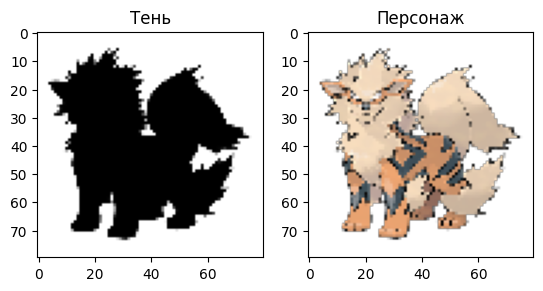

In [ ]:
'''
Вывод изображений: тень | покемон
'''

fig, ax = plt.subplots(1, 2)

ax[0].set_title("Тень")
ax[1].set_title("Персонаж")
ax[0].imshow(shadow_img)
ax[1].imshow(np.reshape(solution, (80, 80, 4)))



#### Вывод

Сделайте выводы относительно того, насколько удачно сработала нейронная сеть. Порассуждайте, почему так произошло.

---
> ✨ **Вывод** ✨
>
> *Мне кажется, что нейросеть сработала довольно удачно, потому что визуально тень и полученный персонаж совпадают по форме, к тому же персонаж получился с довольно хорошей четкостью, картинка не смазанная, покемон узнаваем. На мой взгляд, качество полученного результата зависело в первую очередь от численного метода, применявшегося в работе. Метод Рунге-Кутты отличился точностью результата еще в первой части работы: даже при относительно большом шаге $dt$, полученные с его помощью значения были максимально приближены к истинному решению дифференциального уравнения. Думаю, если бы для получения покемона использовался бы метод Эйлера, во-первых, пришлось бы брать очень маленькое значение шага $dt$, во-вторых, результат все равно был бы не таким точным. Последнее предположение основано на результате восстановления цифр в предыдущем задании, где как раз в основе и лежал метод Эйлера.*
---

#### Самая обязательная часть

Ну и, естественно, Вам необходимо узнать имя выпавшего покемона и его способности 😀

~~Ведь в этом суть лабораторных по программированию, разве нет?!~~

---
> ✨ **Место для имени и способностей покемона** ✨
>
> *Мне кажется, что это Арканайн - большой крепкий четвероногий собакоподобный покемон, покрыт рыжей шерстью с толстыми черными полосками.*
>
> *Его характеристики*
>
>*тип: огненный (1 поколение)*
>
>*способности: Intimidate, Flash Fire, Justified.*
---